# US Accidents EDA (4.2 million records)

TODO- talk about EDA
TODO- talk about the dataset (source, what it contains, how it will be useful)
  - Kaggle (https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data)
  - Information about accidents
  - Useful to prevent accidents

## Download Data

In [1]:
!pip install opendatasets  --upgrade --quiet

In [2]:
#using opendatasets to download dataset
import opendatasets as od

#Dataset url
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

#function to download file download()
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: paulrajdip
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:06<00:00, 98.9MB/s]


In [3]:
#Reading file
data_filename = '/content/us-accidents/US_Accidents_March23.csv'

## Data Preparation and Cleaning
1. Load files using pandas
2. Learn about the file
3. Fix any incorrect or missing values

In [4]:
#Import libraries
import pandas as pd
import seaborn as sns

In [5]:
#file size too large to load, so using chunk of 4.2 million
chunk_size = 4200000

df = pd.read_csv(data_filename, chunksize=chunk_size)
#concating chunks back to single df
df = pd.concat(df)

In [28]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
#See shape of df
df.shape

(7728394, 46)

In [ ]:
#check columns
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
#check stats of numeric columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [ ]:
#count number of numeric columns

numeric_col = df.select_dtypes(include=['number'])
len(numeric_col.columns)

13

In [ ]:
#count missing values for each column
missing_val = round(df.isnull().sum()/len(df)*100, 2)

#sort in descending order
missing_val.sort_values(ascending=False)

End_Lat                  44.03
End_Lng                  44.03
Precipitation(in)        28.51
Wind_Chill(F)            25.87
Wind_Speed(mph)           7.39
Visibility(mi)            2.29
Wind_Direction            2.27
Humidity(%)               2.25
Weather_Condition         2.24
Temperature(F)            2.12
Pressure(in)              1.82
Weather_Timestamp         1.56
Nautical_Twilight         0.30
Civil_Twilight            0.30
Sunrise_Sunset            0.30
Astronomical_Twilight     0.30
Airport_Code              0.29
Street                    0.14
Timezone                  0.10
Zipcode                   0.02
Traffic_Calming           0.00
Railway                   0.00
Roundabout                0.00
Station                   0.00
Stop                      0.00
Country                   0.00
Traffic_Signal            0.00
Junction                  0.00
Turning_Loop              0.00
End_Time                  0.00
Start_Time                0.00
Severity                  0.00
No_Exit 

<Axes: >

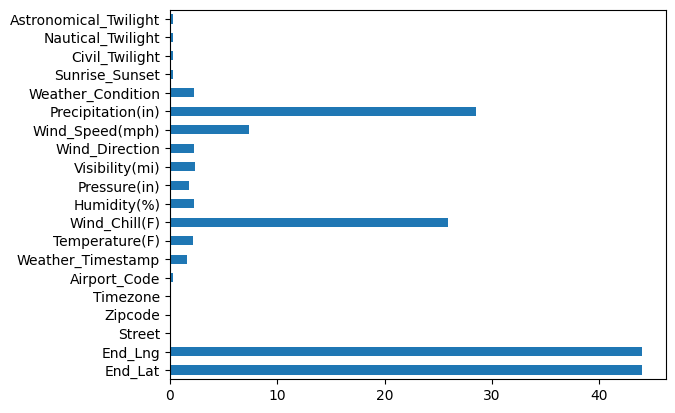

In [ ]:
#columns with missing values
missing_val = missing_val[missing_val != 0]

#plot
missing_val.plot(kind= 'barh')

## Exploratory Analysis and Visualization

In [ ]:
#Cities by states
cities_by_state = df.groupby('State')['City'].apply(list)
cities_by_state

State
AL    [Eufaula, Valley, Phenix City, Pittsview, Madi...
AR    [Springdale, Earle, Malvern, Rogers, Marion, F...
AZ    [Golden Valley, Peoria, Phoenix, Phoenix, Buck...
CA    [Vallejo, Hayward, Walnut Creek, Cupertino, Sa...
CO    [Denver, Wheat Ridge, Henderson, Aurora, Denve...
CT    [Bridgeport, Norwalk, Madison, Hartford, Green...
DC    [Washington, Washington, Washington, Washingto...
DE    [Wilmington, Hockessin, Claymont, Claymont, Ne...
FL    [Tampa, Tampa, Miami, Hialeah, Pompano Beach, ...
GA    [Fairburn, Atlanta, Atlanta, Atlanta, Atlanta,...
IA    [Council Bluffs, Red Oak, Cedar Rapids, Cedar ...
ID    [Pinehurst, Post Falls, Coeur D Alene, Coeur D...
IL    [Warrenville, Glen Ellyn, Lombard, Waukegan, H...
IN    [Hammond, Hammond, Munster, Hammond, Hazleton,...
KS    [Overland Park, Gardner, Shawnee, Gardner, Kan...
KY    [Foster, Greenup, Greenup, Ashland, Ashland, S...
LA    [New Orleans, Baton Rouge, Bossier City, Lafay...
MA    [Chicopee, Wellesley, Lexington, Bur

In [ ]:
cities = df.City.unique()
#Check number of cities present in data
len(cities)

13679

In [ ]:
#city by number of accidents
city_by_accident = df.City.value_counts()
city_by_accident.sort_values(ascending=False)

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Bon Secour                           1
Sidney Center                        1
Fluker                               1
Mapleville                           1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

#### Which 10 cities have the highest number of accidents?

In [ ]:
#Top 10 cities with most accidents
city_by_accident[:10]

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: count, dtype: int64

<Axes: xlabel='City'>

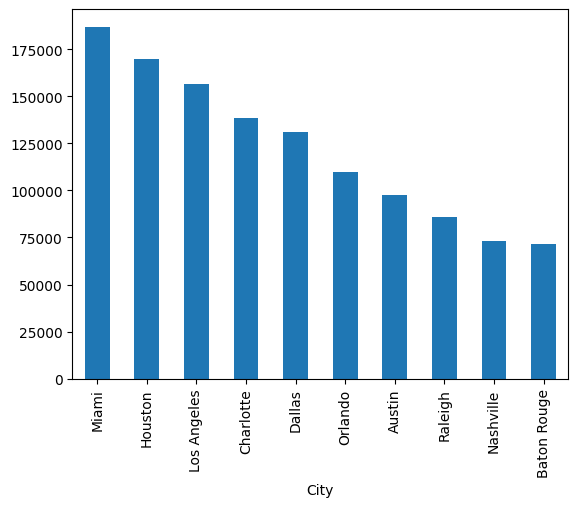

In [ ]:
#Plot
city_by_accident[:10].plot(kind='bar')

In [ ]:
#State wise accidents
state_by_accident = df.State.value_counts()
state_by_accident.sort_values(ascending=False)

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

#### Which 10 states have the highest number of accidents?

In [ ]:
#Top 10 states with most accidents
state_by_accident[:10]

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

<Axes: xlabel='State'>

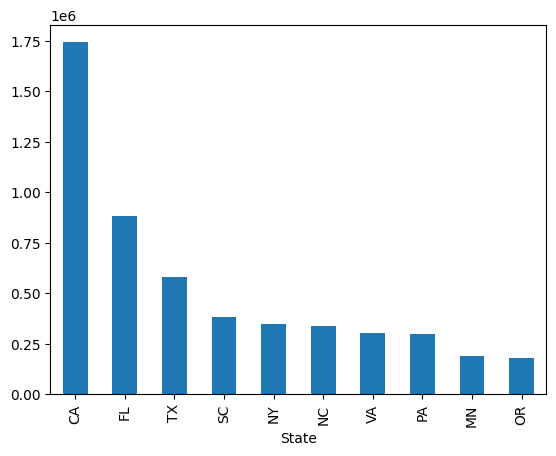

In [ ]:
state_by_accident[:10].plot(kind='bar')

In [ ]:
#Categorise cities as high and low accident prone

high_accident_cities = city_by_accident[city_by_accident >=1000]

low_accident_cities = city_by_accident[city_by_accident <1000]

In [ ]:
# percentage of cities with more than 1000 reported accidents
round(len(high_accident_cities)/len(city_by_accident)*100, 2)

8.9

In [ ]:
# percentage of cities with less than 1000 reported accidents
round(len(low_accident_cities)/len(city_by_accident)*100, 2)

91.1

### We can see that most of the cities have less than 1000 reported accidents and only 8.9% cities have more than 1000 reported accidents

<Axes: xlabel='count', ylabel='Count'>

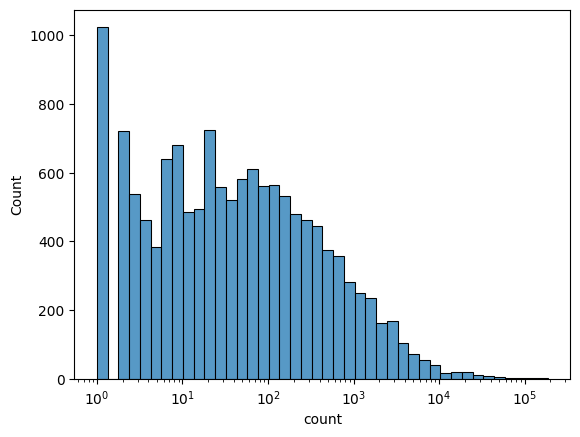

In [ ]:
#plot cities by accident count, x= count of accidents, y = count of cities
sns.histplot(city_by_accident, log_scale=True)

In [ ]:
#as per plot checking cities with only 1 reported accident
city_by_accident[city_by_accident == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

#### Surprisingly from the above plot we can see that there are more than 1000 cities with 0 reported accidents and the number of cities with only 1 reported accident is 1023.

In [19]:
# Remove trailing zeros after the decimal point
df['Start_Time'] = df['Start_Time'].str.replace(r'(\.\d*?[1-9])0+$', r'\1', regex=True)

# Remove any remaining trailing decimal point and trailing .0
df['Start_Time'] = df['Start_Time'].str.replace(r'\.0+$', '', regex=True)

In [20]:
#Verifying if trailing zeroes are removed
records_with_extra_chars = df.Start_Time[df['Start_Time'].str.contains('.0')]
print(records_with_extra_chars)

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object


In [ ]:
#Convert to datetime
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
#Numbe of years for which data is present
df.Start_Time.dt.year.unique()

array([2016, 2017, 2022, 2021, 2020, 2019, 2018, 2023], dtype=int32)

#### What is the trend of accidents over the years?

<Axes: xlabel='Start_Time', ylabel='Count'>

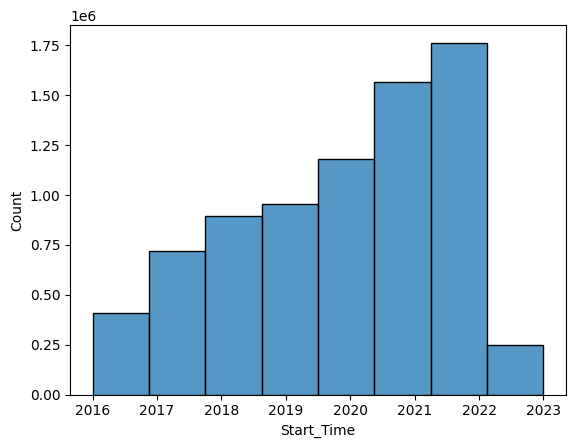

In [ ]:
sns.histplot(df.Start_Time.dt.year, bins=8)

#### The plot shows that the number of accidents increased exponentially over the years but shows a sudden decrease in year 2023. This might be because that the chunk of data present here has limited representation from the year 2023. So we will go ahead with the trend that accidents are increasing over the years.

#### Which is the most frquent time of day when accidents happen?

<Axes: xlabel='Start_Time', ylabel='Count'>

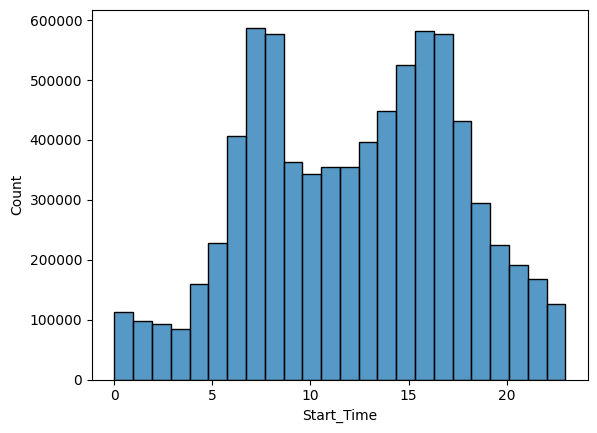

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

#### It is quite clear that most accidents occur during 6am to 9am and 3pm to 6pm. This might be because of heavy traffic caused due to people going and returning from work, schools, colleges etc.

#### Which days in a week have more number of accidents being reported?

<Axes: xlabel='Start_Time', ylabel='Count'>

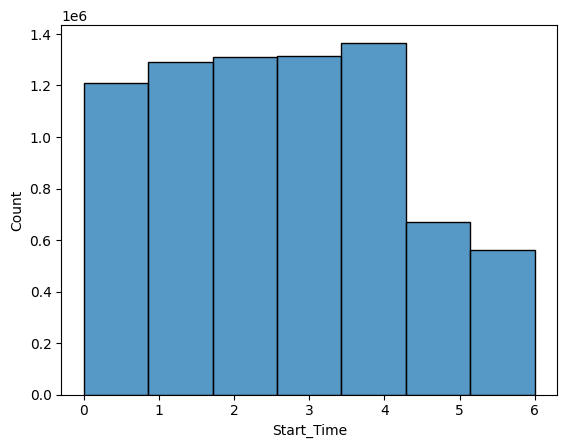

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7)

#### The plot shows that weekdays have the majority of accidents

<Axes: xlabel='Start_Time', ylabel='Count'>

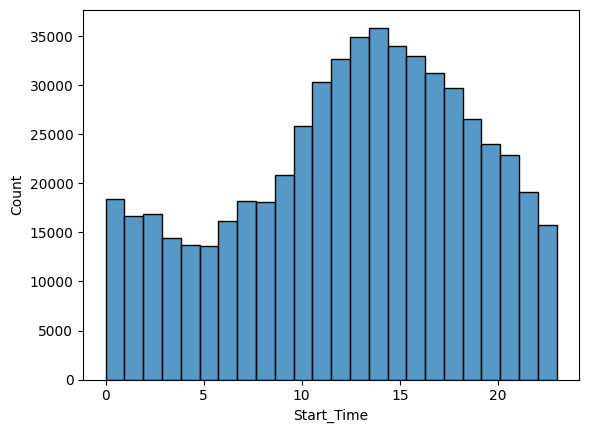

In [ ]:
#Check if more accidents occur at different time during weekend than weekdays
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sunday_start_time.dt.hour, bins=24)

#### We checked for Sunday and figured out that most accidents occur between 12 noon to 6pm

<Axes: xlabel='Start_Time', ylabel='Count'>

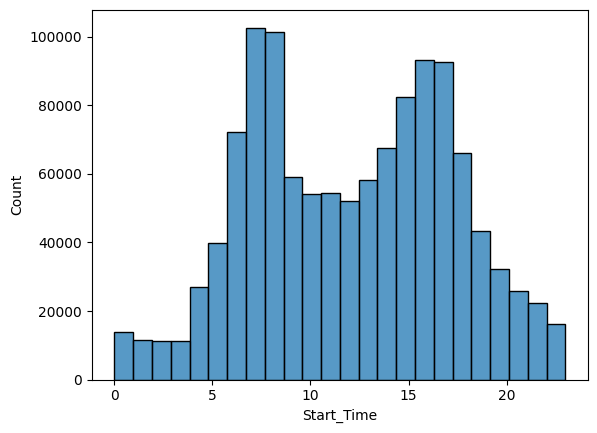

In [ ]:
#Check if more accidents occur at different time during weekdays than weekends
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(monday_start_time.dt.hour, bins=24)

#### We checked for Monday and found that during weekdays the time when accidents occur most is more distributed.

#### Are more accidents happening in Summer or Winter?
#### Which months have the most accidents?

<Axes: xlabel='Start_Time', ylabel='Count'>

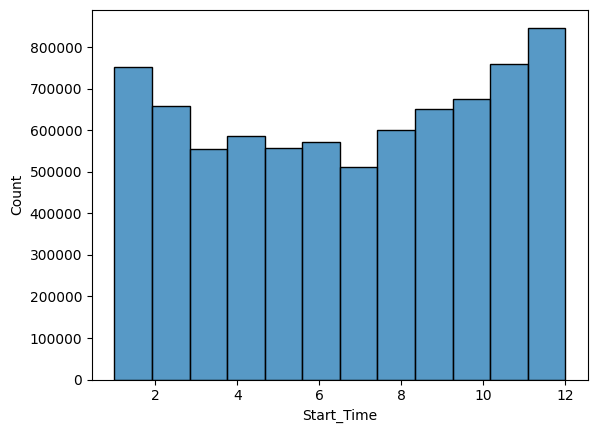

In [ ]:
#Monthwise accident rates over the years
sns.histplot(df.Start_Time.dt.month, bins=12)

From the above graph we can see that accidents during Winters occur more. Most accidents occur during November, December and January.

<Axes: xlabel='Start_Time', ylabel='Count'>

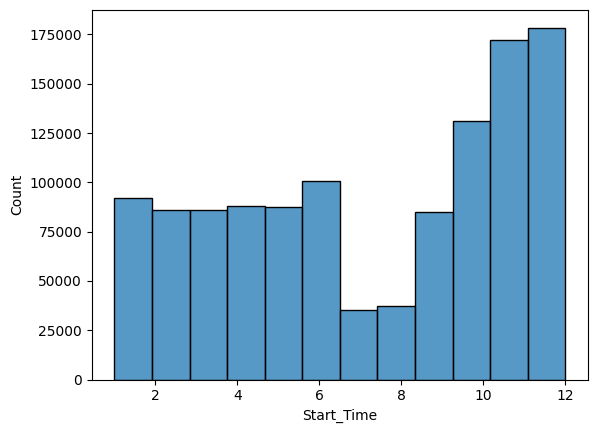

In [ ]:
#Checking accident trend for year 2020
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.histplot(df_2020.Start_Time.dt.month, bins=12)

<Axes: ylabel='count'>

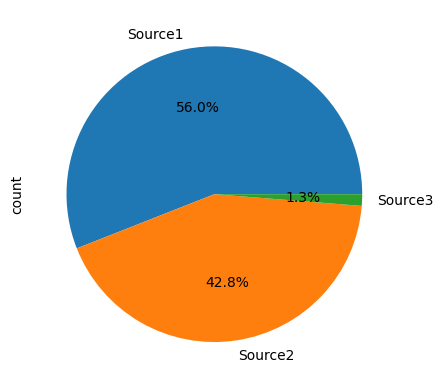

In [18]:
#Check source of data distribution
df.Source.value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

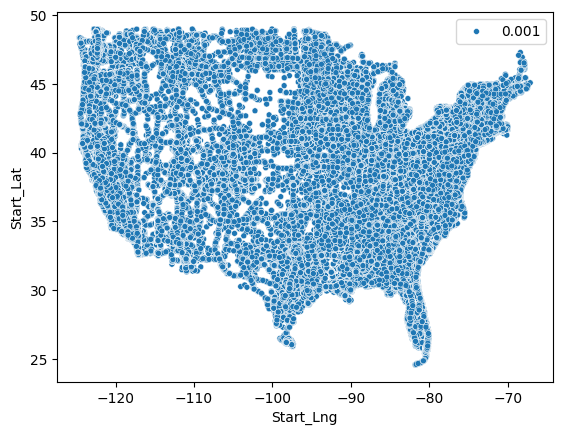

In [ ]:
#Start Latitude and Longitude
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size=0.001)

#### The above plot shows that accidents are more frequent in the coastal areas which might be because those areas are heavily populated.

#### Checking severity of majority accidents

<Axes: ylabel='count'>

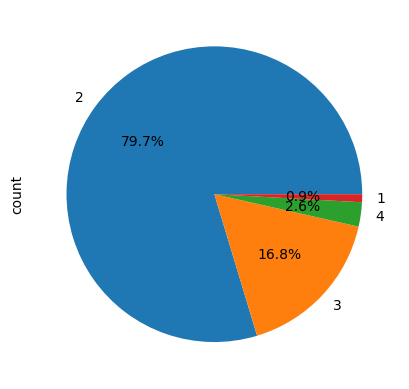

In [16]:
df.Severity.value_counts().plot(kind='pie', autopct='%1.1f%%')

#### We can infer that majority of accidents (~80%) are of severity 2

<Axes: xlabel='Traffic_Calming'>

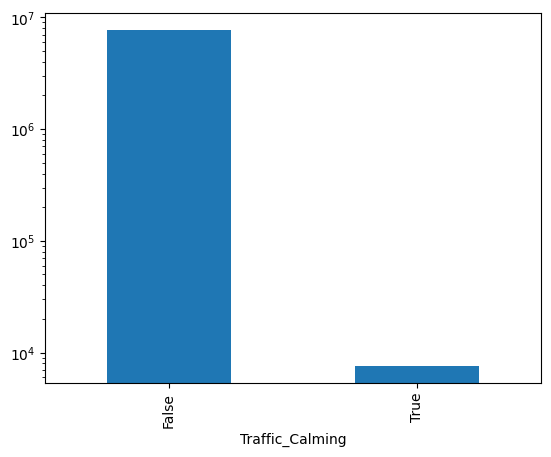

In [34]:
df.Traffic_Calming.value_counts().plot(kind='bar', logy=True)

#### We can infer that most accidents occured where there was no traffic calming near by

<Axes: xlabel='Traffic_Signal'>

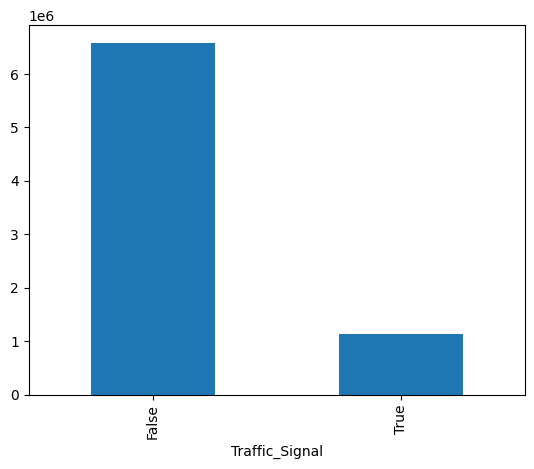

In [36]:
df.Traffic_Signal.value_counts().plot(kind='bar')

#### We can infer that most accidents occured where there was no traffic signal near by

In [41]:
df.rename(columns={'Visibility(mi)':'visibility'}, inplace=True)

<Axes: ylabel='visibility'>

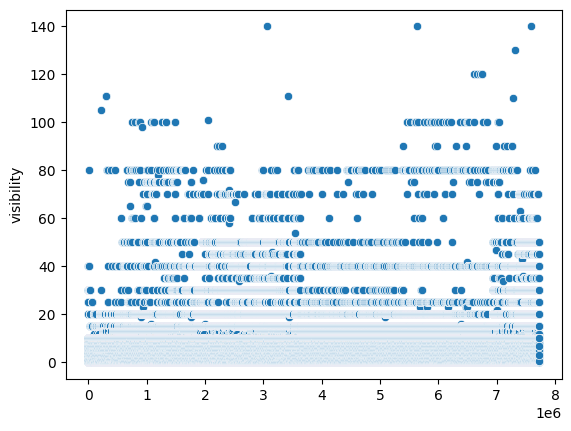

In [47]:
sns.scatterplot(df.visibility)

#### We can see from the above plot that almost accidents occur when visibility is low (0mi to 80mi)

## Summary and Conclusion

#### Though more number of columns can be evaluated, we gathered a lot of interesting information from the above EDA. The most interesting inferences were:
- Top 10 cities with most number of accidents.
- Top 10 states with most number of accidents.
- Only 8.9% cities have more than 1000 reported accidents.
- There are more than 1000 cities with 0 reported accidents and the number of cities with only 1 reported accident is 1023.
- Number of accidents increased exponentially over the years.
- Most accidents occur during 6am to 9am and 3pm to 6pm.
- Weekdays have the majority of accidents.
- Most accidents occur between 12 noon to 6pm on weekends
- During weekdays the time when accidents occur most is more distributed.
- Accidents during Winters occur more. Most accidents occur during November, December and January.
- Accidents are more frequent in the coastal areas.
- We can infer that most accidents occured where there was no traffic calming near by
- We can infer that most accidents occured where there was no traffic signal near by

- We can see from the above plot that almost accidents occur when visibility is low (0mi to 80mi)